In [1]:
#By Noah Youngren

In [117]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [118]:
#import the csv file
data = pd.read_csv("weather_data_v1.csv")

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   3195 non-null   object 
 1   Maximum                3195 non-null   int64  
 2   Minimum                3195 non-null   int64  
 3   Average                3195 non-null   float64
 4   Mean_Lake_Temperature  3195 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 124.9+ KB


In [120]:
"""
Burlington Weather data
Date: Includes day, month, and year
Maximum: Maximum Temperature for that day
Minimum: Mimimum Temperature for that day
Average: Average Temperature for that day
Mean_Lake_Temperature: Average Temperature of Lake Champlain for that day

--- Note ---
Adding the Lake data slightly improved my model accuracy and has a >0.5 correlation with Average temp
"""

'\nBurlington Weather data\nDate: Includes day, month, and year\nMaximum: Maximum Temperature for that day\nMinimum: Mimimum Temperature for that day\nAverage: Average Temperature for that day\nMean_Lake_Temperature: Average Temperature of Lake Champlain for that day\n\n--- Note ---\nAdding the Lake data slightly improved my model accuracy and has a >0.5 correlation with Average temp\n'

In [121]:
#converts the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y')

# RFR can't handle raw datetime format, so we split it into 3 different columns
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   3195 non-null   datetime64[ns]
 1   Maximum                3195 non-null   int64         
 2   Minimum                3195 non-null   int64         
 3   Average                3195 non-null   float64       
 4   Mean_Lake_Temperature  3195 non-null   float64       
 5   Year                   3195 non-null   int64         
 6   Month                  3195 non-null   int64         
 7   Day                    3195 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 199.8 KB


In [123]:
data.corr()

/var/folders/my/7qz64kq15_dggjw8fw22m1x40000gn/T/ipykernel_19141/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Maximum,Minimum,Average,Mean_Lake_Temperature,Year,Month,Day
Maximum,1.000000,0.936685,0.985307,0.590192,0.035547,0.291203,0.016342
Minimum,0.936685,1.000000,0.982729,0.607717,0.046640,0.344109,0.017685
Average,0.985307,0.982729,1.000000,0.608294,0.041533,0.321721,0.017261
Mean_Lake_Temperature,0.590192,0.607717,0.608294,1.000000,0.001250,0.487673,0.024462
Year,0.035547,0.046640,0.041533,0.001250,1.000000,-0.061268,-0.000951
Month,0.291203,0.344109,0.321721,0.487673,-0.061268,1.000000,0.010632
Day,0.016342,0.017685,0.017261,0.024462,-0.000951,0.010632,1.000000


In [124]:
#performs a train-test split of the dataset
#random state = repeatable results
#this is just storage for now

def find_maximum():
    X = data[['Date', 'Minimum', 'Average']] #features
    y = data['Maximum'] #target

    # TT split (80/20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
def find_minimum():
    X = data[['Date', 'Maximum', 'Average']] #features
    y = data['Mimimum'] #target

    # TT split (80/20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
def find_average(): #this is the one I'll use for the prototype
    X = data[['Date', 'Minimum', 'Maximum']] #features
    y = data['Average'] #target

    # TT split (80/20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Full Year Model Demo

In [125]:
#RandomForestRegressor model used

X = data[['Year', 'Month', 'Day', 'Minimum', 'Maximum']] #features
y = data['Average'] #target

#NOTE: This model is a test, results-wise it is redundant due to using min and max as features to find average!

# TT split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [126]:
#test the model
from sklearn.metrics import mean_squared_error

#metric used to measure the average squared differences
#between the true and predicted values in a regression problem
#lower mse equals better
prediction = model.predict(X_test)
mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error:",mse)

Mean Squared Error: 0.13569902190923314


In [127]:
#this finds the R squared value
#which is how accurately the model predicts the target variable
model.score(X_test, y_test)

0.9996814377300502

In [128]:
#now we do some actual predictions
#this one is the October 2023 test, using dates not included in the dataset
#test for average temp

#test_date = input("Enter the date you want to predict (mm/dd/yy): ")
#Ex: 10/08/23
#Min: 49
#Max: 60
#Avg: 54.5

#test_min = input("Enter min temp: ")
#test_max = input("Enter max temp: ")

test_data = pd.DataFrame({
    'Date': ["10/08/23"], #[test_date],
    'Minimum': 49, # [test_min],
    'Maximum': 60}) # [test_max]})

test_data['Date'] = pd.to_datetime(test_data['Date'], format='%m/%d/%y')

test_data['Year'] = test_data['Date'].dt.year
test_data['Month'] = test_data['Date'].dt.month
test_data['Day'] = test_data['Date'].dt.day

#actual prediction part
predicted_avg = model.predict(test_data[['Year', 'Month', 'Day', 'Minimum', 'Maximum']])
predicted_avg_temperature = predicted_avg[0]
print("The predicted average temperature is:", predicted_avg_temperature)


The predicted average temperature is: 54.83


In [129]:
#this is method only uses date (Y/M/D) as features

X = data[['Year', 'Month', 'Day']] #features
y = data['Average'] #target

# TT split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

modelT = RandomForestRegressor()
modelT.fit(X_train, y_train)


test_date = '10/08/23'
#Ex: 10/08/23 Min: 49 Max: 60 Avg: 54.5

test_data = pd.DataFrame({
    'Date': [test_date]
})

test_data['Date'] = pd.to_datetime(test_data['Date'], format='%m/%d/%y')

test_data['Year'] = test_data['Date'].dt.year
test_data['Month'] = test_data['Date'].dt.month
test_data['Day'] = test_data['Date'].dt.day

prediction = modelT.predict(test_data[['Year', 'Month', "Day"]])

predicted_avg_temperature = prediction[0]

prediction = modelT.predict(X_test)
mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error:",mse)
print(modelT.score(X_test, y_test))
print(predicted_avg_temperature)

Mean Squared Error: 37.219357447916664
0.9106515770716853
54.23


In [130]:
#test with date and maximum
X = data[['Year', 'Month', 'Day', 'Maximum']] #features
y = data['Average'] #target

# TT split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

test_date = "10/08/23"
test_min = 49
test_max = 60


test_data = pd.DataFrame({
    'Date': [test_date],
    'Maximum': [test_max]
})

test_data['Date'] = pd.to_datetime(test_data['Date'], format='%m/%d/%y')

test_data['Year'] = test_data['Date'].dt.year
test_data['Month'] = test_data['Date'].dt.month
test_data['Day'] = test_data['Date'].dt.day

#actual prediction part
prediction = model.predict(X_test)
mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error:",mse)
print(model.score(X_test, y_test))

predicted_avg = model.predict(test_data[['Year', 'Month', 'Day', 'Maximum']])
#predicted_avg_temperature = predicted_avg[0]
print("The predicted average temperature is:", predicted_avg[0])

Mean Squared Error: 11.949255046948355
0.971948347464803
The predicted average temperature is: 50.86


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   3195 non-null   datetime64[ns]
 1   Maximum                3195 non-null   int64         
 2   Minimum                3195 non-null   int64         
 3   Average                3195 non-null   float64       
 4   Mean_Lake_Temperature  3195 non-null   float64       
 5   Year                   3195 non-null   int64         
 6   Month                  3195 non-null   int64         
 7   Day                    3195 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 199.8 KB


In [132]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Full Year Model Full Ver. & Visualization

In [133]:
#load the actual october 2023 data
october_data = pd.read_csv("october_data.csv", parse_dates=["Date"])
october_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     31 non-null     datetime64[ns]
 1   Maximum  31 non-null     int64         
 2   Minimum  31 non-null     int64         
 3   Average  31 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.1 KB


In [134]:
october_data.head()

,Date,Maximum,Minimum,Average
0,2023-10-01,78,51,64.5
1,2023-10-02,75,49,62.0
2,2023-10-03,84,52,68.0
3,2023-10-04,86,57,71.5
4,2023-10-05,83,62,72.5


In [135]:
october_data['Year'] = october_data['Date'].dt.year
october_data['Month'] = october_data['Date'].dt.month
october_data['Day'] = october_data['Date'].dt.day

In [136]:
october_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     31 non-null     datetime64[ns]
 1   Maximum  31 non-null     int64         
 2   Minimum  31 non-null     int64         
 3   Average  31 non-null     float64       
 4   Year     31 non-null     int64         
 5   Month    31 non-null     int64         
 6   Day      31 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 1.8 KB


In [137]:
X = data[['Year', 'Month', 'Day']] #features
y = data['Average'] #target

# TT split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_oct = RandomForestRegressor()
model_oct.fit(X_train, y_train)

r_squared = []
oct_predictions = []
day = []

for i in range(1,32,1):
    test_data = pd.DataFrame({'Year': [2023],'Month': [10],'Day': [i]})
    
    predicted_avg = model_oct.predict(test_data[['Year', 'Month', 'Day']])
    day.append(i)
    oct_predictions.append(predicted_avg[0])
    r_squared.append(model_oct.score(X_test, y_test))

predicted_avg_temps = pd.DataFrame({"Day":day, "Average Temperature":oct_predictions})

print("The average R^2 value of the predicted data is:",round(sum(r_squared)/len(r_squared),4))
prediction = model_oct.predict(X_test)
mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error:",mse)

The average R^2 value of the predicted data is: 0.912
Mean Squared Error: 37.465806885759


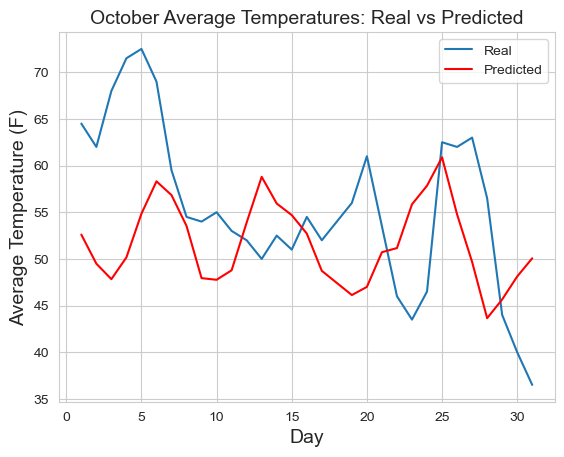

In [138]:
plt.plot(october_data["Day"], october_data["Average"])
plt.plot(predicted_avg_temps["Day"], predicted_avg_temps["Average Temperature"], color = 'r')

plt.xlabel("Day", fontsize=14)
plt.ylabel("Average Temperature (F)", fontsize=14)
plt.title("October Average Temperatures: Real vs Predicted", fontsize=14)

plt.legend(["Real", "Predicted"])

plt.show()

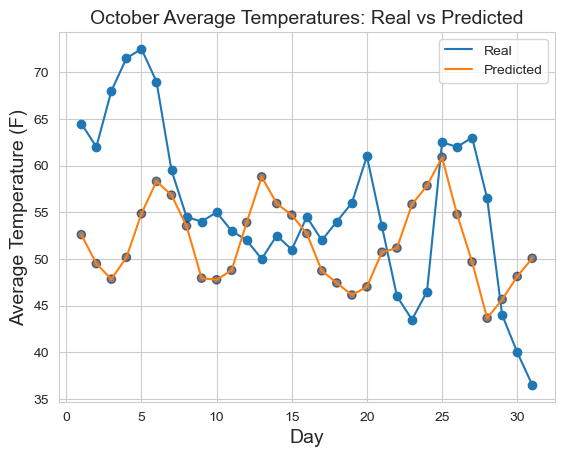

In [139]:
#combined line+scatter graph

plt.plot(october_data["Day"], october_data["Average"])
plt.plot(predicted_avg_temps["Day"], predicted_avg_temps["Average Temperature"])

plt.scatter(october_data["Day"], october_data["Average"])
plt.scatter(predicted_avg_temps["Day"], predicted_avg_temps["Average Temperature"], c = r_squared, alpha=.5)

plt.xlabel("Day", fontsize=14)
plt.ylabel("Average Temperature (F)", fontsize=14)
plt.title("October Average Temperatures: Real vs Predicted", fontsize=14)

plt.legend(["Real", "Predicted"])

plt.show()

# Four Seasons/Quarters Model

In [140]:
data = pd.read_csv("weather_data_v1.csv")

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# R1 Model

In [141]:
#this model splits the dataset into four parts based on month (1-3, 4-6, 7-9, 10-12)

#R1 / Season 1
mask_r1_1 = data["Month"] <= 3
r1_data = data[mask_r1_1]

X = r1_data[['Year', 'Month', 'Day']] #features
y = r1_data['Average'] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error:",mse)
print("R Squared: ",model.score(X_test, y_test))

Mean Squared Error: 69.14485751533743
R Squared:  0.5304102621276384


In [142]:
# data count isn't quite at 1000, which definitely contributes to the worse accuracy 
r1_data["Day"].count()

812

# R2 Model

In [143]:
#R2 / Season 2
mask_r2_1 = data["Month"].between(4,6)
r2_data = data[mask_r2_1]

X = r2_data[['Year', 'Month', 'Day']] #features
y = r2_data['Average'] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error:",mse)
print("R Squared: ",model.score(X_test, y_test))

Mean Squared Error: 35.81808963414633
R Squared:  0.7605726843149755


In [144]:
# data count isn't quite at 1000, which definitely contributes to the worse accuracy 
r2_data["Day"].count()

819

# R3 Model

In [145]:
#R3 / Season 3
mask_r3_1 = data["Month"].between(7,9)
r3_data = data[mask_r3_1]

X = r3_data[['Year', 'Month', 'Day']] #features
y = r3_data['Average'] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error:",mse)
print("R Squared: ",model.score(X_test, y_test))

Mean Squared Error: 20.16093207831325
R Squared:  0.6119900095683422


In [146]:
# data count isn't quite at 1000, which definitely contributes to the worse accuracy 
r3_data["Day"].count()

828

# R4 Model

In [147]:
#R4 / Season 4
mask_r4_1 = data["Month"].between(10,12)
r4_data = data[mask_r4_1]

X = r4_data[['Year', 'Month', 'Day']] #features
y = r4_data['Average'] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error:",mse)
print("R Squared: ",model.score(X_test, y_test))

Mean Squared Error: 45.32836925675676
R Squared:  0.7648788615077201


In [148]:
# data count is worse than the others due to the fact that it does not include October 2023 
r4_data["Day"].count()

736

In [149]:
X = r4_data[['Year', 'Month', 'Day']] #features
y = r4_data['Average'] #target

# TT split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_r4 = RandomForestRegressor()
model_r4.fit(X_train, y_train)

r4_r_squared = []
r4_oct_predictions = []
day = []

for i in range(1,32,1):
    test_data = pd.DataFrame({'Year': [2023],'Month': [10],'Day': [i]})
    
    predicted_avg = model_r4.predict(test_data[['Year', 'Month', 'Day']])
    day.append(i)
    r4_oct_predictions.append(predicted_avg[0])
    r_squared.append(model_r4.score(X_test, y_test))

r4_predicted_avg_temps = pd.DataFrame({"Day":day, "Average Temperature":r4_oct_predictions})

print("The average R^2 value of the predicted R4 data is:",round(sum(r_squared)/len(r_squared),4))

The average R^2 value of the predicted R4 data is: 0.8366


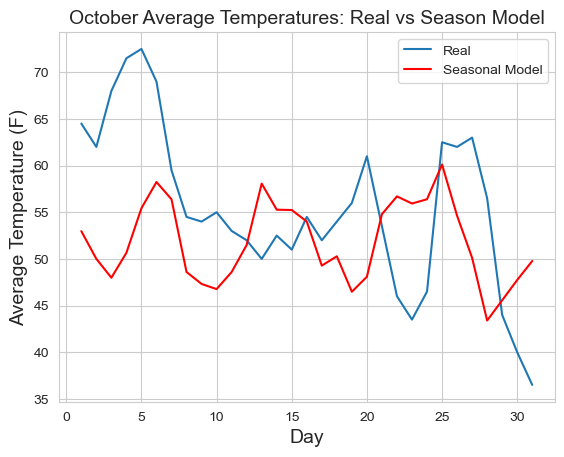

In [150]:
plt.plot(october_data["Day"], october_data["Average"])
plt.plot(r4_predicted_avg_temps["Day"], r4_predicted_avg_temps["Average Temperature"], color = 'r')

plt.xlabel("Day", fontsize=14)
plt.ylabel("Average Temperature (F)", fontsize=14)
plt.title("October Average Temperatures: Real vs Season Model", fontsize=14)

plt.legend(["Real", "Seasonal Model"])

plt.show()

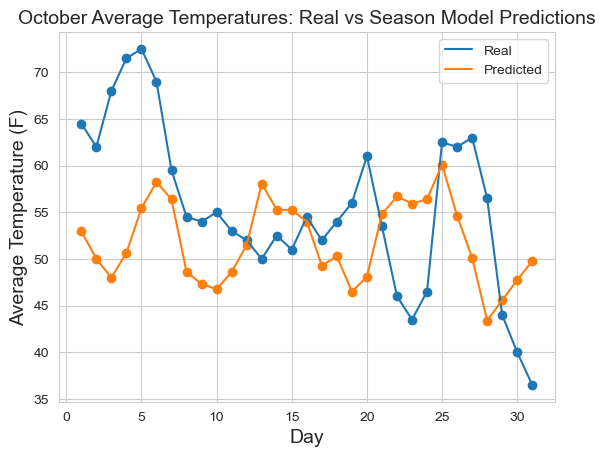

In [151]:
plt.plot(october_data["Day"], october_data["Average"])
plt.plot(r4_predicted_avg_temps["Day"], r4_predicted_avg_temps["Average Temperature"])

plt.scatter(october_data["Day"], october_data["Average"])
plt.scatter(r4_predicted_avg_temps["Day"], r4_predicted_avg_temps["Average Temperature"])

plt.xlabel("Day", fontsize=14)
plt.ylabel("Average Temperature (F)", fontsize=14)
plt.title("October Average Temperatures: Real vs Season Model Predictions", fontsize=14)

plt.legend(["Real", "Predicted"])

plt.show()

# Direct Model Comparison

In [152]:
# Now, I'll compare the year model and the R4 model to each other
compared_data = pd.DataFrame({"Day": october_data["Day"],
                              "Year Model":predicted_avg_temps["Average Temperature"],
                              "R4 Model":r4_predicted_avg_temps["Average Temperature"]})
compared_data.head(10)

,Day,Year Model,R4 Model
0,1,52.605,52.975
1,2,49.490,50.005
2,3,47.830,47.985
3,4,50.165,50.660
4,5,54.845,55.435
5,6,58.310,58.240
6,7,56.835,56.390
7,8,53.535,48.600
8,9,47.940,47.320
9,10,47.765,46.765


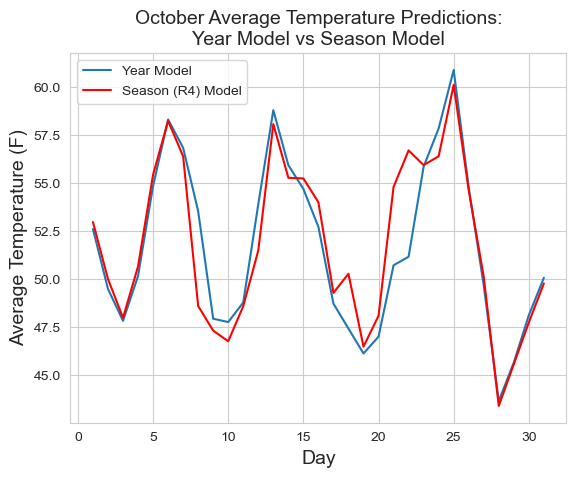

In [153]:
plt.plot(compared_data["Day"], compared_data["Year Model"])
plt.plot(compared_data["Day"], compared_data["R4 Model"], color = 'r')

plt.xlabel("Day", fontsize=14)
plt.ylabel("Average Temperature (F)", fontsize=14)
plt.title("October Average Temperature Predictions:\nYear Model vs Season Model", fontsize=14)

plt.legend(["Year Model", "Season (R4) Model"])

plt.show()

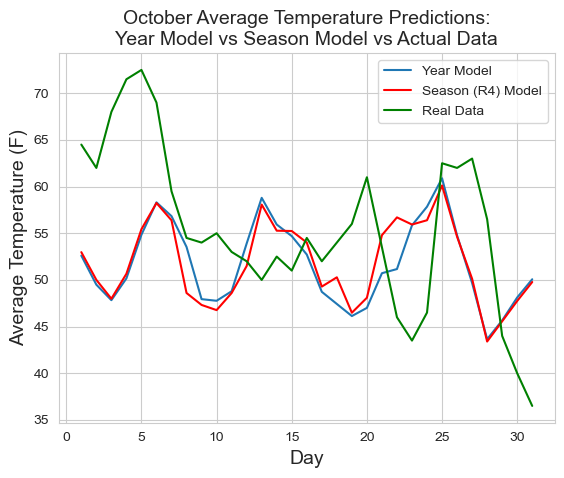

In [154]:
plt.plot(compared_data["Day"], compared_data["Year Model"])
plt.plot(compared_data["Day"], compared_data["R4 Model"], color = 'r')
plt.plot(october_data["Day"], october_data["Average"], color = 'g')

plt.xlabel("Day", fontsize=14)
plt.ylabel("Average Temperature (F)", fontsize=14)
plt.title("October Average Temperature Predictions:\nYear Model vs Season Model vs Actual Data", fontsize=14)

plt.legend(["Year Model", "Season (R4) Model", "Real Data"])

plt.show()

# Train Test Split Value Tests

In [52]:
from sklearn.metrics import mean_squared_error

In [56]:
#year long model TTS value test
test_size = []
r_squared = []
mean_sq_error = []

for j in range(5, 35):
    X = data[['Year', 'Month', 'Day']] #features
    y = data['Average'] #target
    
    j=j *0.01
    # TT split (80/20)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=j, random_state=42)

    model_oct = RandomForestRegressor()
    model_oct.fit(X_train, y_train)
    
    test_size.append(j)

    r_squared.append(round(model_oct.score(X_test, y_test),4))
    prediction = model_oct.predict(X_test)
    mse = mean_squared_error(y_test, prediction)
    mean_sq_error.append(round(mse, 4))

year_train_test = pd.DataFrame({"TTS Size":test_size,
                                "R Squared Value":r_squared,
                                "Mean Squared Error":mean_sq_error})
year_train_test

,TTS Size,R Squared Value,Mean Squared Error
0,0.05,0.9053,37.5279
1,0.06,0.9123,34.2853
2,0.07,0.9194,32.9366
3,0.08,0.9234,33.4058
4,0.09,0.9262,31.9908
5,0.10,0.9229,31.9959
6,0.11,0.9164,35.3133
7,0.12,0.9154,35.6711
8,0.13,0.9127,36.6071
9,0.14,0.9115,35.9696


# R4 Model

In [90]:
#R4 / Season 4
test_size = []
r_squared = []
mean_sq_error = []

for j in range(1, 35):
    mask_r4_1 = data["Month"].between(10,12)
    r4_data = data[mask_r4_1]

    X = r4_data[['Year', 'Month', 'Day']] #features
    y = r4_data['Average'] #target
    
    j=j *0.01
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=j, random_state=42)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    test_size.append(j)
    

    r_squared.append(round(model_oct.score(X_test, y_test),4))
    prediction = model_oct.predict(X_test)
    mse = mean_squared_error(y_test, prediction)
    mean_sq_error.append(round(mse, 4))

r4_train_test = pd.DataFrame({"TTS Size":test_size,
                              "R Squared Value":r_squared,
                              "Mean Squared Error":mean_sq_error})
r4_train_test

,TTS Size,R Squared Value,Mean Squared Error
0,0.01,0.8265,33.8894
1,0.02,0.8858,19.4741
2,0.03,0.9099,15.6185
3,0.04,0.9365,13.3809
4,0.05,0.9370,14.1795
5,0.06,0.9350,13.6550
6,0.07,0.9380,14.3051
7,0.08,0.9220,17.6409
8,0.09,0.9287,16.4510
9,0.10,0.9174,17.7990


# Visualizations at highest R^2 Value

In [76]:
#Year-long model
data = pd.read_csv("weather_data_v1.csv")

#converts the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y')

# RFR can't handle raw datetime format, so we split it into 3 different columns
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
october_data = pd.read_csv("october_data.csv", parse_dates=["Date"])
october_data['Year'] = october_data['Date'].dt.year
october_data['Month'] = october_data['Date'].dt.month
october_data['Day'] = october_data['Date'].dt.day

X = data[['Year', 'Month', 'Day']] #features
y = data['Average'] #target

# TT split (set to 0.09)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.09, random_state=42)

model_oct_on = RandomForestRegressor()
model_oct_on.fit(X_train, y_train)

r_squared_on = []
oct_predictions_on = []
day_on = []

for i in range(1,32,1):
    test_data_on = pd.DataFrame({'Year': [2023],'Month': [10],'Day': [i]})
    
    predicted_avg_on = model_oct_on.predict(test_data_on[['Year', 'Month', 'Day']])
    day_on.append(i)
    oct_predictions_on.append(predicted_avg_on[0])
    r_squared_on.append(model_oct_on.score(X_test, y_test))

predicted_avg_temps_on = pd.DataFrame({"Day":day_on, "Average Temperature":oct_predictions_on})

print("The average R^2 value of the predicted data is:",round(sum(r_squared_on)/len(r_squared_on),4))
prediction = model_oct_on.predict(X_test)
mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error:",mse)

The average R^2 value of the predicted data is: 0.9272
Mean Squared Error: 31.531786024305557


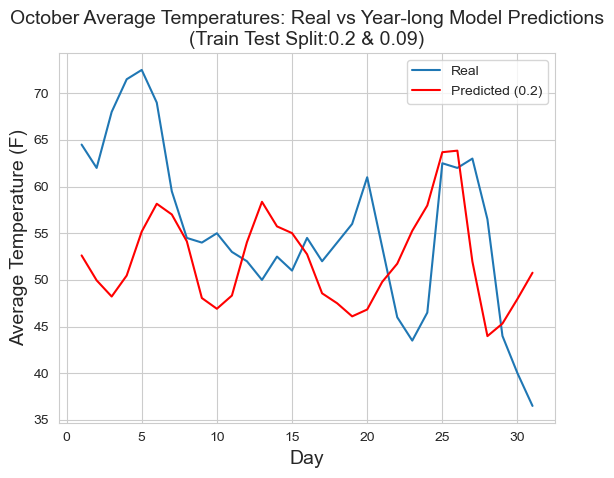

In [156]:
plt.plot(october_data["Day"], october_data["Average"])
plt.plot(predicted_avg_temps_on["Day"], predicted_avg_temps_on["Average Temperature"], color = 'r')

plt.xlabel("Day", fontsize=14)
plt.ylabel("Average Temperature (F)", fontsize=14)
plt.title("October Average Temperatures: Real vs Year-long Model Predictions\n(Train Test Split:0.2 & 0.09)", fontsize=14)

plt.legend(["Real", "Predicted (0.2)", "Predicted (0.09)"])

plt.show()

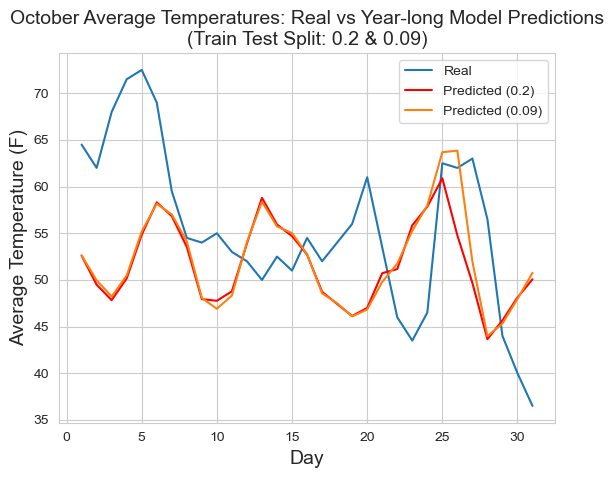

In [155]:
plt.plot(october_data["Day"], october_data["Average"])
plt.plot(predicted_avg_temps["Day"], predicted_avg_temps["Average Temperature"], color = 'r')
plt.plot(predicted_avg_temps_on["Day"], predicted_avg_temps_on["Average Temperature"])

plt.xlabel("Day", fontsize=14)
plt.ylabel("Average Temperature (F)", fontsize=14)
plt.title("October Average Temperatures: Real vs Year-long Model Predictions\n(Train Test Split: 0.2 & 0.09)", fontsize=14)

plt.legend(["Real", "Predicted (0.2)", "Predicted (0.09)"])

plt.show()

In [ ]:
plt.plot(october_data["Day"], october_data["Average"])
plt.plot(predicted_avg_temps_on["Day"], predicted_avg_temps_on["Average Temperature"], color = 'r')

plt.xlabel("Day", fontsize=14)
plt.ylabel("Average Temperature (F)", fontsize=14)
plt.title("October Average Temperatures: Real vs Predicted (TTS:0.09)", fontsize=14)

plt.legend(["Real", "Predicted"])

plt.show()

# R4 Model

In [93]:
X = r4_data[['Year', 'Month', 'Day']] #features
y = r4_data['Average'] #target

# TT split (0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

model_r4_on = RandomForestRegressor()
model_r4_on.fit(X_train, y_train)

r4_r_squared_on = []
r4_oct_predictions_on = []
day_on = []

for i in range(1,32,1):
    test_data_on = pd.DataFrame({'Year': [2023],'Month': [10],'Day': [i]})
    
    predicted_avg_on = model_r4_on.predict(test_data_on[['Year', 'Month', 'Day']])
    day_on.append(i)
    r4_oct_predictions_on.append(predicted_avg_on[0])
    r_squared_on.append(model_r4_on.score(X_test, y_test))

r4_predicted_avg_temps_on = pd.DataFrame({"Day":day, "Average Temperature":r4_oct_predictions_on})

print("The average R^2 value of the predicted R4 data is:",round(sum(r_squared_on)/len(r_squared_on),4))

The average R^2 value of the predicted R4 data is: 0.8865


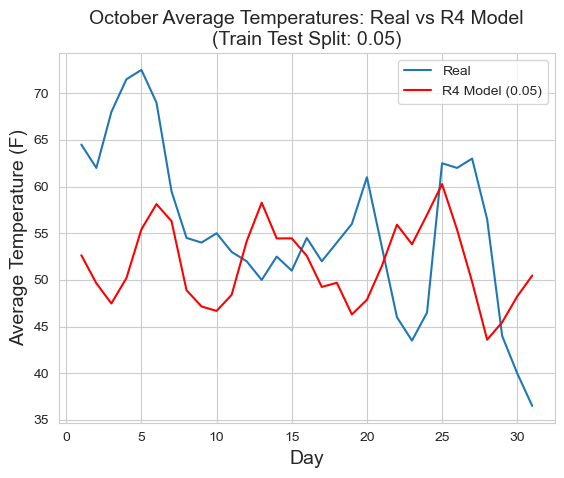

In [97]:
#compared to real
plt.plot(october_data["Day"], october_data["Average"])
plt.plot(r4_predicted_avg_temps_on["Day"], r4_predicted_avg_temps_on["Average Temperature"], color = 'r')

plt.xlabel("Day", fontsize=14)
plt.ylabel("Average Temperature (F)", fontsize=14)
plt.title("October Average Temperatures: Real vs R4 Model\n(Train Test Split: 0.05)", fontsize=14)

plt.legend(["Real", "R4 Model (0.05)"])

plt.show()

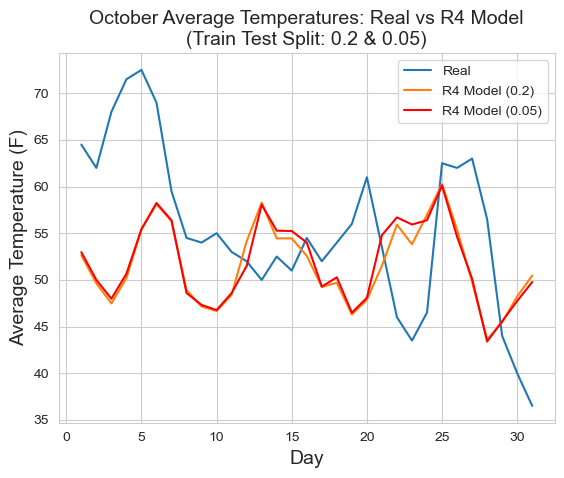

In [158]:
# real vs both models
plt.plot(october_data["Day"], october_data["Average"])
plt.plot(r4_predicted_avg_temps_on["Day"], r4_predicted_avg_temps_on["Average Temperature"])
plt.plot(r4_predicted_avg_temps["Day"], r4_predicted_avg_temps["Average Temperature"], color = 'r')


plt.xlabel("Day", fontsize=14)
plt.ylabel("Average Temperature (F)", fontsize=14)
plt.title("October Average Temperatures: Real vs R4 Model\n(Train Test Split: 0.2 & 0.05)", fontsize=14)

plt.legend(["Real", "R4 Model (0.2)", "R4 Model (0.05)"])

plt.show()